#Reference

https://www.geeksforgeeks.org/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

https://medium.com/analytics-vidhya/clustering-on-iris-dataset-in-python-using-k-means-4735b181affe

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#Load dataset

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

#Data Exploration

In [ ]:
dataset.data.shape

(1797, 64)

In [ ]:

dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

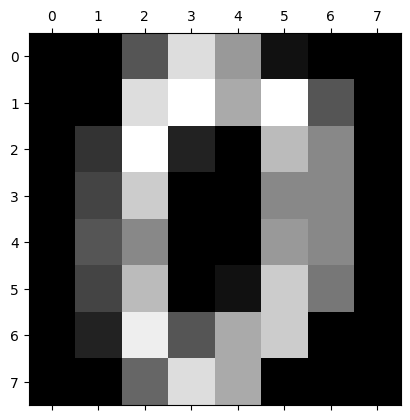

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8));

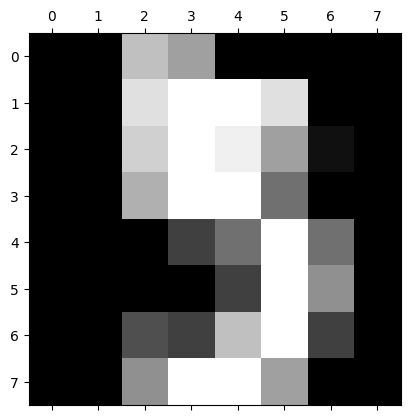

In [ ]:
plt.matshow(dataset.data[5].reshape(8,8))

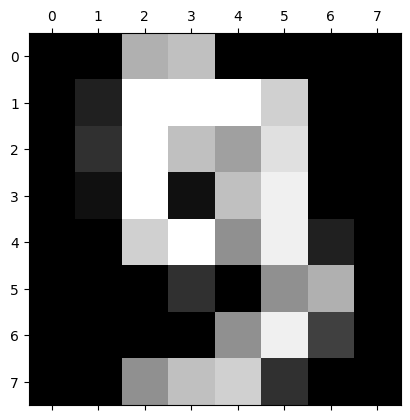

In [ ]:
plt.matshow(dataset.data[9].reshape(8,8))

In [ ]:
dataset.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

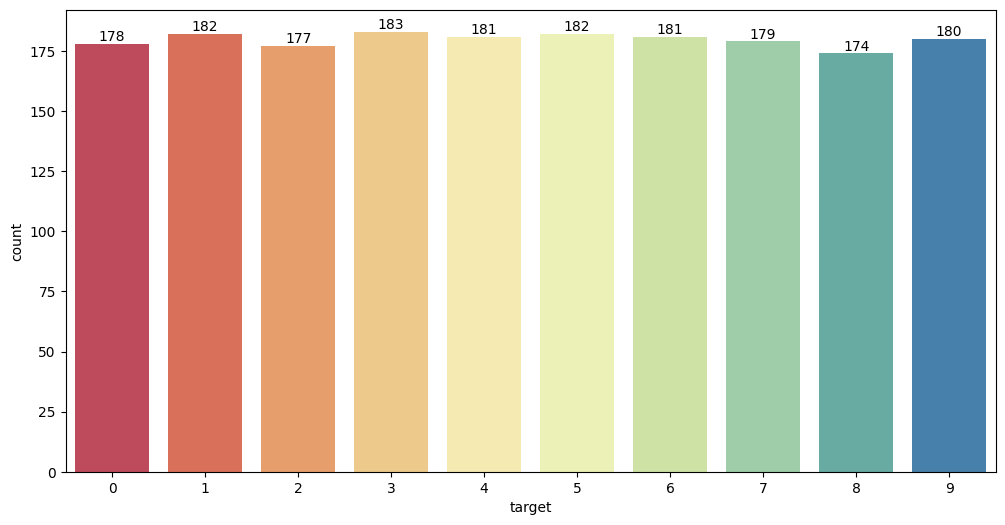

In [ ]:
data = load_digits(as_frame=True)

plt.figure(figsize=(12,6))
dg = sns.countplot(data = data.frame, x = "target", palette='Spectral')
add_label(dg)
plt.show()

#Data Normalization

In [ ]:
X = df
y = dataset.target

##Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

##Using PCA : N Component = 2

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [ ]:
pca.explained_variance_ratio_.sum()

0.21594970500832789

In [ ]:
pca.n_components_

2

#K Means Clustering Algorithm

##1.k-means++

### Elbow plot

In [ ]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

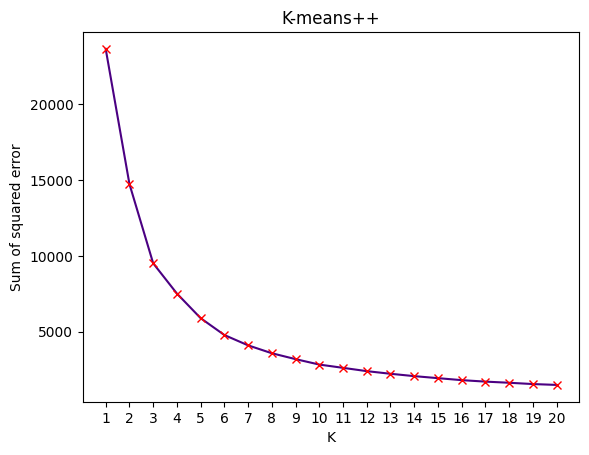

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('K-means++')
plt.ticklabel_format(style='plain')
plt.plot(range(1,21), wcss, 'Indigo', marker='x', markeredgecolor='r')
plt.xticks(range(1,21))

plt.show()

### K = 10

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=10,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
kmeans.inertia_

2815.320245182415

### Visualizing the clusters

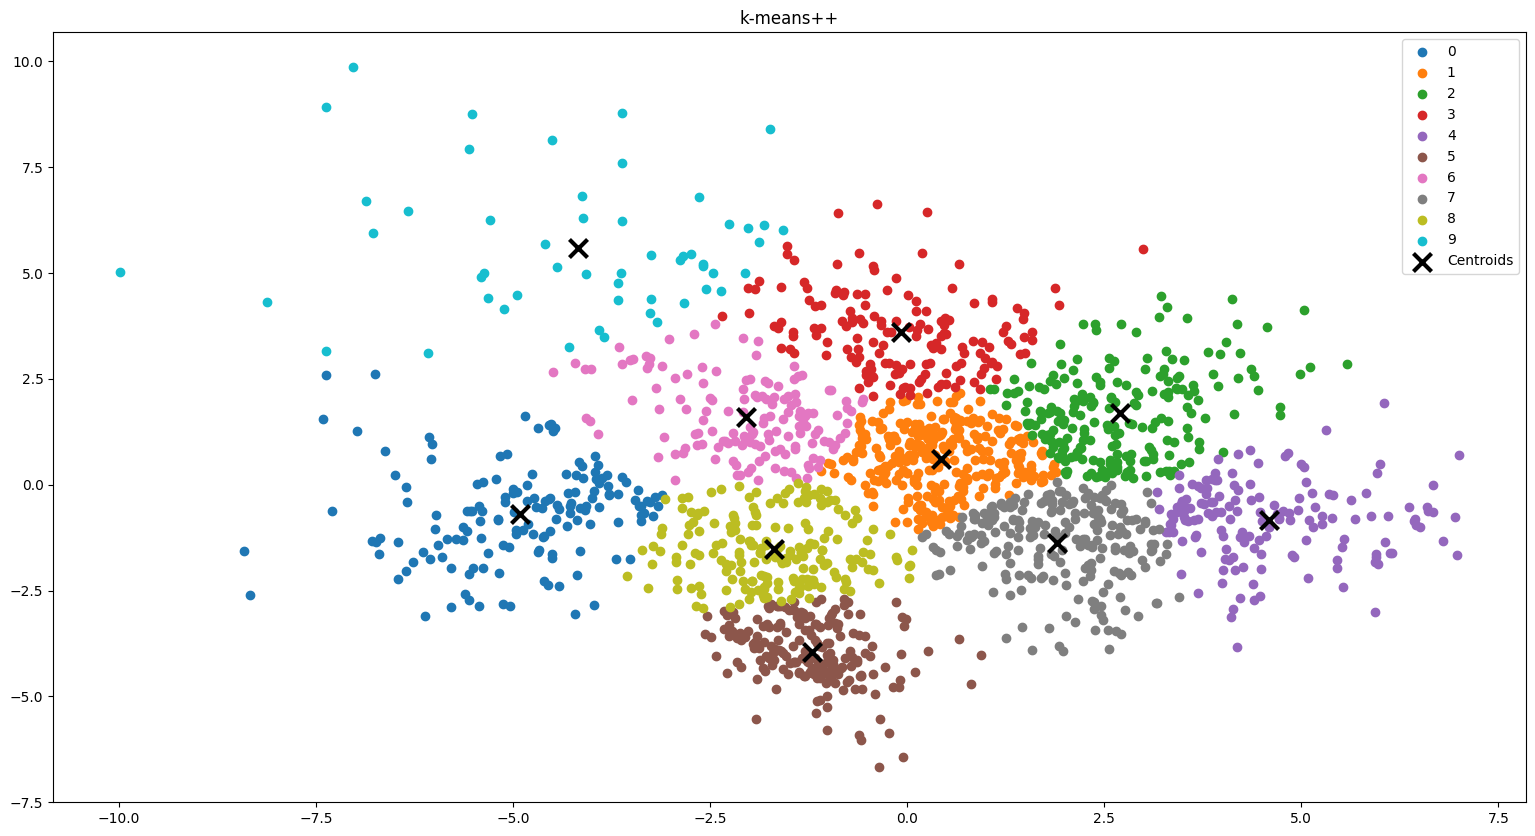

In [ ]:
plt.figure(figsize=(19, 10))
plt.title('k-means++')

for label in dataset.target_names:
  plt.scatter(X_pca[y_kmeans == label, 0],
                  X_pca[y_kmeans == label, 1],
                  label=label)

plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                marker='x', s=169, linewidths=3,
                color='k', zorder=10,
                label='Centroids')

plt.legend()
plt.show()

In [ ]:
unique, counts = np.unique(y_kmeans, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 153]
 [  1 292]
 [  2 215]
 [  3 157]
 [  4 157]
 [  5 202]
 [  6 148]
 [  7 227]
 [  8 193]
 [  9  53]]


##2.random

### Elbow plot

In [ ]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,
                    init='random',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

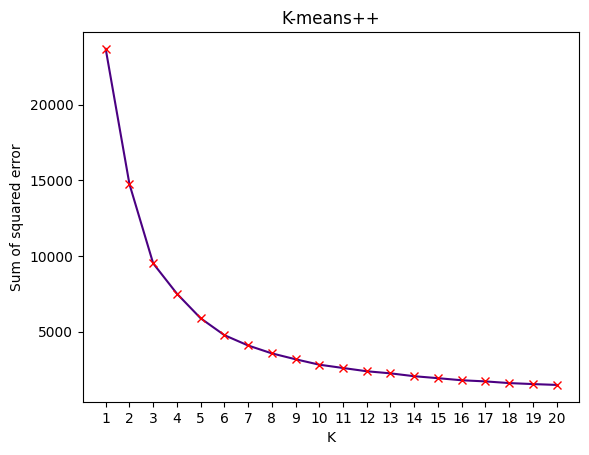

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('K-means++')
plt.ticklabel_format(style='plain')
plt.plot(range(1,21), wcss, 'Indigo', marker='x', markeredgecolor='r')
plt.xticks(range(1,21))

plt.show()

### K = 10

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=10,
                init='random',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
kmeans.inertia_

2816.5067122258024

### Visualizing the clusters

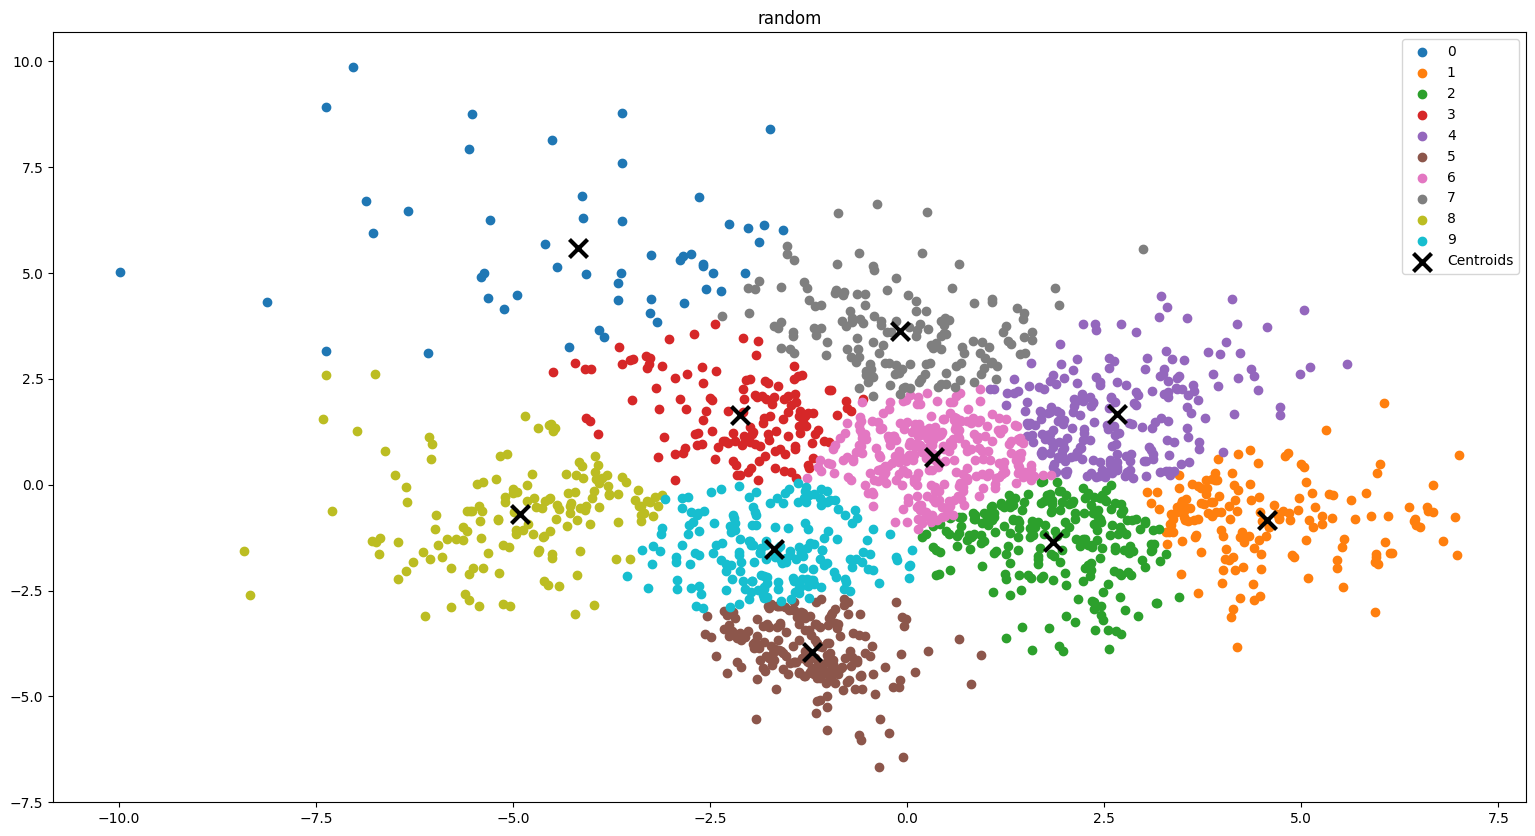

In [ ]:
plt.figure(figsize=(19, 10))
plt.title('random')

for label in dataset.target_names:
  plt.scatter(X_pca[y_kmeans == label, 0],
                  X_pca[y_kmeans == label, 1],
                  label=label)

plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                marker='x', s=169, linewidths=3,
                color='k', zorder=10,
                label='Centroids')

plt.legend()
plt.show()

In [ ]:
unique, counts = np.unique(y_kmeans, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0  53]
 [  1 160]
 [  2 232]
 [  3 139]
 [  4 223]
 [  5 202]
 [  6 288]
 [  7 154]
 [  8 153]
 [  9 193]]


##3.PCA-based

### Elbow plot

In [ ]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,
                    init=X_pca[:i, :],
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

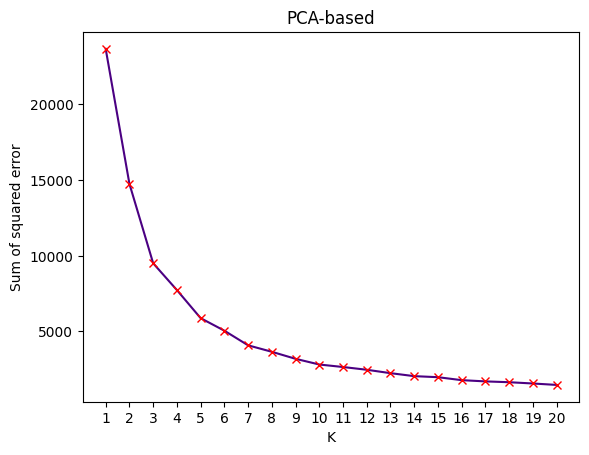

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('PCA-based')
plt.ticklabel_format(style='plain')
plt.plot(range(1,21), wcss, 'Indigo', marker='x', markeredgecolor='r')
plt.xticks(range(1,21))

plt.show()

### K = 10

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=10,
                init=X_pca[:10, :],
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
kmeans.inertia_

2817.615663546561

### Visualizing the clusters

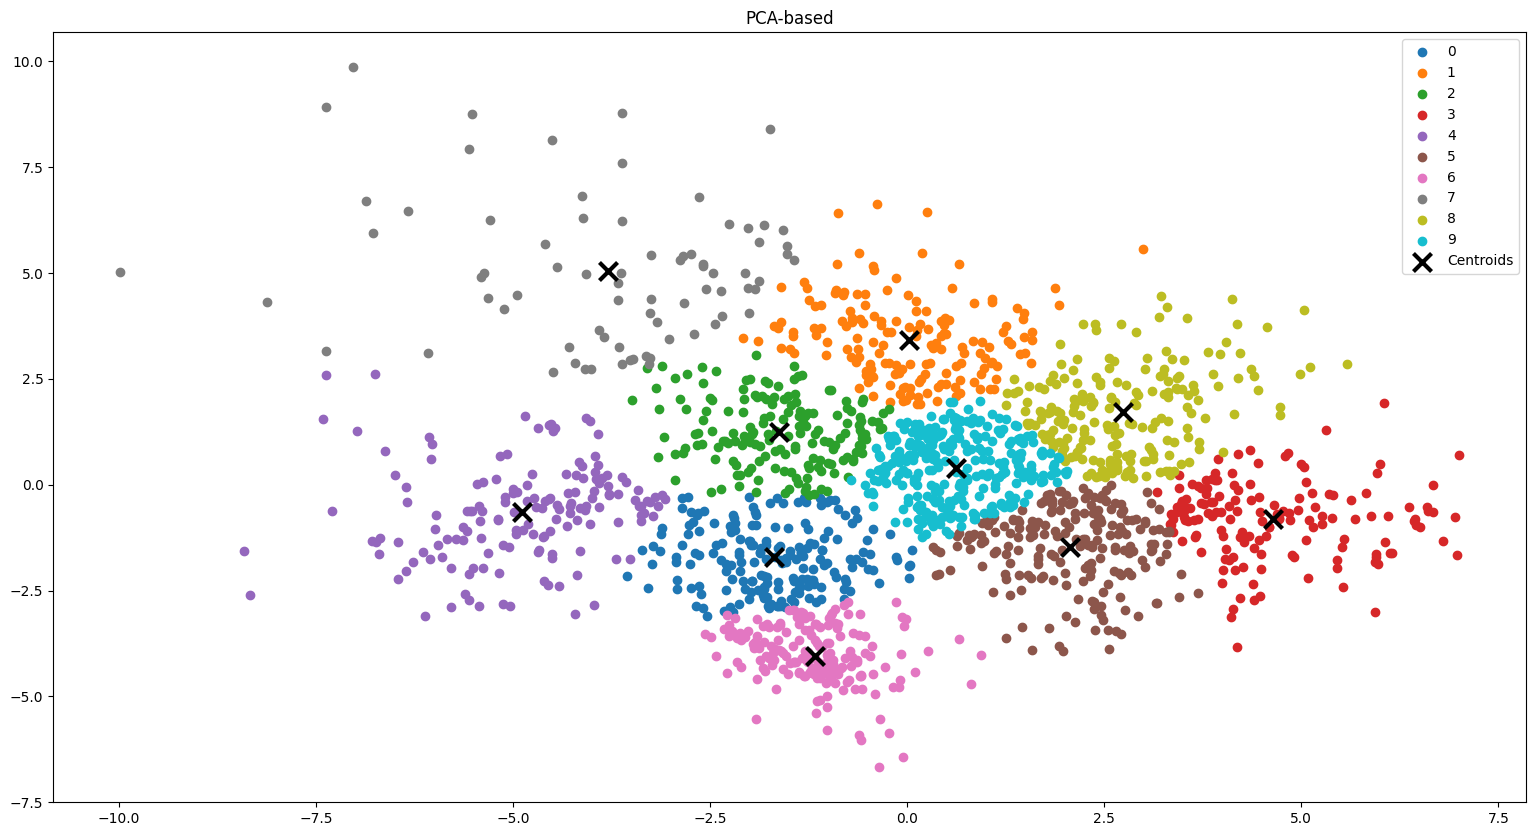

In [ ]:
plt.figure(figsize=(19, 10))
plt.title('PCA-based')

for label in dataset.target_names:
  plt.scatter(X_pca[y_kmeans == label, 0],
                  X_pca[y_kmeans == label, 1],
                  label=label)

plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                marker='x', s=169, linewidths=3,
                color='k', zorder=10,
                label='Centroids')

plt.legend()
plt.show()

In [ ]:
unique, counts = np.unique(y_kmeans, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 193]
 [  1 163]
 [  2 169]
 [  3 151]
 [  4 157]
 [  5 207]
 [  6 188]
 [  7  75]
 [  8 205]
 [  9 289]]
